In [1]:
import pandas as pd
import nltk
from nltk import FreqDist
import pandas as pd
pd.set_option("display.max_colwidth", 200)
import numpy as np
import re
import spacy

import gensim
from gensim import corpora

# libraries for visualization
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pt = pd.read_excel('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/popular topics.xlsx')

In [3]:
column_name = pt.columns[0]
pt.rename({column_name:'popular_topic'},axis=1,inplace=True)

In [4]:
#clean text
import re
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

tc = lambda x: clean_text(x)

# Let's take a look at the updated text
data_clean = pd.DataFrame(pt.popular_topic.apply(tc))
data_clean.head()

<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<>:8: DeprecationWarning: invalid escape sequence \[
<>:10: DeprecationWarning: invalid escape sequence \w
<ipython-input-4-afe49f5fc488>:8: DeprecationWarning: invalid escape sequence \[
  text = re.sub('\[.*?\]', '', text)
<ipython-input-4-afe49f5fc488>:10: DeprecationWarning: invalid escape sequence \w
  text = re.sub('\w*\d\w*', '', text)


,popular_topic
0,science education skepticism testing curiosity and logic in the early grades
1,facts please keep the politics out of science
2,funding issues
3,i like the mix now
4,more on higher education and other professional issues eg increase of adjudicating


In [5]:
#Remove stop words
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = stopwords.words('english')
data_clean['popular_topic'] = data_clean['popular_topic'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
data_clean.head()

,popular_topic
0,science education skepticism testing curiosity logic early grades
1,facts please keep politics science
2,funding issues
3,like mix
4,higher education professional issues eg increase adjudicating


In [6]:
#Lemmatize data
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
def to_string(df):
    return ' '.join(df)

data_clean['popular_topic'] = data_clean.popular_topic.apply(lemmatize_text)
data_clean['popular_topic'] = data_clean['popular_topic'].map(to_string)

#data_clean.to_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dataset/popular_topics_clean.csv',index=False)

# Visualize data

In [7]:
pt2 = pd.read_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/dataset/popular_topics_clean.csv')

In [8]:
# function to plot most frequent terms
from nltk import FreqDist

def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(22,10))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.tight_layout()
    plt.show()


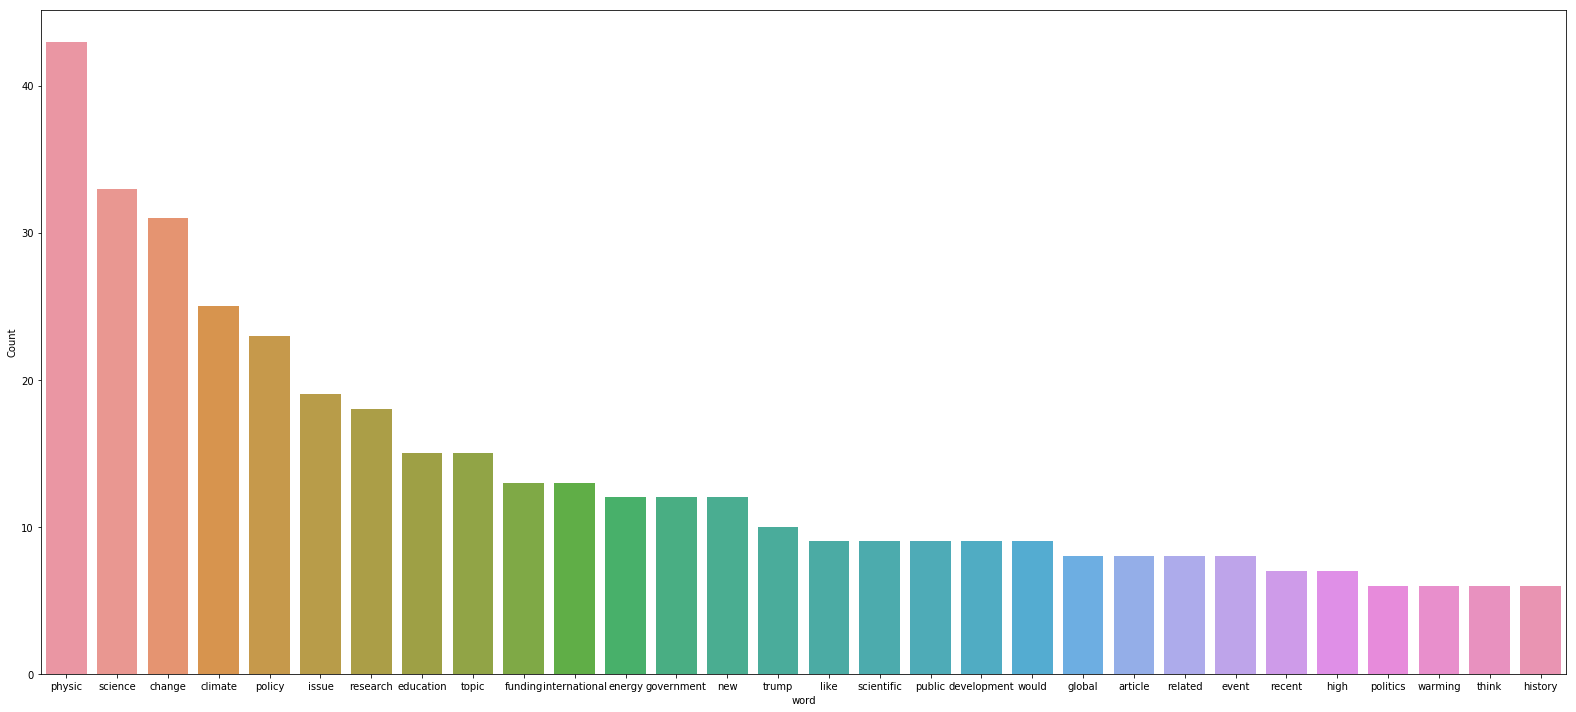

In [9]:
freq_words(pt2['popular_topic'])

In [13]:
dict(freq_df.sort_values('DateValue',ascending=False))

{'Date': 22            physic
 0            science
 47            change
 46           climate
 26            policy
 13             issue
 110         research
 33             topic
 1          education
 178    international
 12           funding
 36            energy
 42        government
 127              new
 249            trump
 74            public
 198            would
 14              like
 104      development
 49        scientific
 34            global
 60           article
 145            event
 139          related
 106             high
 59            recent
 58             think
 72           history
 342          student
 35           warming
            ...      
 266            clear
 303        discussed
 285        direction
 302             bill
 301            input
 299             iran
 298       importance
 296            essay
 295       insightful
 294            enjoy
 291       production
 290         facility
 288             tool
 287           access
 2

In [10]:
topic_list = [word for word in pt2['popular_topic']]
str1 = ' '.join(topic_list)

In [14]:
all_words = ' '.join([text for text in pt2['popular_topic']])
all_words = all_words.split()
fdist = FreqDist(all_words)
fdist_dict = dict(fdist)
freq_df = pd.DataFrame(fdist_dict.items(), columns=['Date', 'DateValue'])
freq_df.sort_values('DateValue',ascending=False)
#freq_df.to_csv('/Users/reggieyang/Desktop/Python/Summer Projects/NLP/final result for NLP 2/popular_freq_df.csv')

,Date,DateValue
22,physic,43
0,science,33
47,change,31
46,climate,25
26,policy,23
13,issue,19
110,research,18
33,topic,15
1,education,15
178,international,13


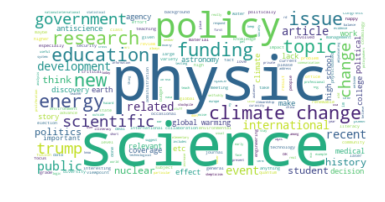

In [12]:
#create wordcloud

import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = str1
wc = WordCloud(background_color="white", repeat=True)
wc.generate(text)
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()